<a href="https://colab.research.google.com/github/JacekPardyak/vps/blob/master/VPS_CHURN_Classification_models_in_R_using_a_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('keras')
install.packages('tfdatasets')
install.packages('rsample')
install.packages('Metrics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘warp’, ‘furrr’, ‘slider’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [30]:
library(keras)
library(tfdatasets)
library(tidyverse)
library(rsample)

In [31]:
vps <- read_csv("https://raw.githubusercontent.com/JacekPardyak/vps/master/data/vps_churn_data.txt") 
head(vps)

Rows: 283 Columns: 23

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (23): id, cpu_load_mean_m_3, disk_octets_read_mean_m_3, disk_octets_writ...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



id,cpu_load_mean_m_3,disk_octets_read_mean_m_3,disk_octets_write_mean_m_3,disk_ops_read_mean_m_3,disk_ops_write_mean_m_3,network_rx_mean_m_3,network_tx_mean_m_3,cpu_load_monthly_mean_delta,network_tx_monthly_mean_delta,⋯,disk_octets_write_monthly_mean_delta,disk_octets_read_monthly_mean_delta,cpu_load_max_gradient,disk_octets_read_max_gradient,disk_octets_write_max_gradient,disk_ops_read_max_gradient,disk_ops_write_max_gradient,network_rx_max_gradient,network_tx_max_gradient,is_churn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,13.37989,38.82583205,0.1185140,336.69720430,6.770323,0.01612843,0.01171808,9.9354480,0.00178400,⋯,0.09822835,38.59628038,0.44565168,1.74435668,0.00463981,14.46249656,0.22755614,-0.00003440,0.00005590,1
101,16.90204,0.00328473,0.3360913,0.08150538,2.793979,0.04812798,0.44380426,-3.9719014,-0.14906840,⋯,-0.00070227,-0.01781286,-0.00172695,-0.00059626,-0.00006430,-0.00633933,-0.00207351,0.00009500,-0.00434225,0
102,248.93591,19.37152776,31.9710273,213.16032260,194.558280,1.72831136,1.35480347,9.6749140,-0.19059860,⋯,-2.34339560,-0.53592374,0.37335290,-0.01865949,-0.07624555,-0.16357924,-0.44157712,-0.02173184,-0.00538242,0
103,14.05419,0.10182502,0.9970053,2.18870968,9.634839,0.08254686,0.00850134,-0.8615287,-0.00713390,⋯,0.05448654,-0.07235670,-0.03158981,-0.00180007,0.00328335,-0.20777508,0.01796263,0.00071597,-0.00031719,1
104,85.79333,15.49345957,14.8748231,280.23193550,9.595376,0.01669605,0.17150479,-3.5555556,-0.06342757,⋯,-0.46046894,-0.43877029,-0.09440948,-0.01649244,-0.01788293,-0.15304266,-0.02211370,-0.00011261,-0.00242201,0
105,39.39430,11.36519674,20.1531819,793.13655910,55.020000,9.81798408,2.11235768,14.8470789,1.93625702,⋯,17.10998272,7.60239588,0.39098123,0.24210812,0.54836924,-4.40403032,0.19133439,0.24408652,0.02221419,0


In [32]:
glimpse(vps)

Rows: 283
Columns: 23
$ id                                   <dbl> 100, 101, 102, 103, 104, 105, 106…
$ cpu_load_mean_m_3                    <dbl> 13.379892, 16.902043, 248.935914,…
$ disk_octets_read_mean_m_3            <dbl> 38.82583205, 0.00328473, 19.37152…
$ disk_octets_write_mean_m_3           <dbl> 0.11851402, 0.33609133, 31.971027…
$ disk_ops_read_mean_m_3               <dbl> 336.69720430, 0.08150538, 213.160…
$ disk_ops_write_mean_m_3              <dbl> 6.770323, 2.793979, 194.558280, 9…
$ network_rx_mean_m_3                  <dbl> 0.01612843, 0.04812798, 1.7283113…
$ network_tx_mean_m_3                  <dbl> 0.01171808, 0.44380426, 1.3548034…
$ cpu_load_monthly_mean_delta          <dbl> 9.93544803, -3.97190143, 9.674913…
$ network_tx_monthly_mean_delta        <dbl> 0.00178400, -0.14906840, -0.19059…
$ network_rx_monthly_mean_delta        <dbl> -0.00083925, 0.00761928, -0.33151…
$ disk_ops_read_monthly_mean_delta     <dbl> 331.68498210, -0.18960574, -22.40…
$ disk_ops_write_m

In [33]:
summary(vps)

       id        cpu_load_mean_m_3  disk_octets_read_mean_m_3
 Min.   :100.0   Min.   :  0.3488   Min.   :  0.0000         
 1st Qu.:170.5   1st Qu.:  8.9093   1st Qu.:  0.1488         
 Median :241.0   Median : 21.2846   Median :  1.2202         
 Mean   :241.0   Mean   : 31.5322   Mean   :  6.1031         
 3rd Qu.:311.5   3rd Qu.: 48.1311   3rd Qu.:  4.5177         
 Max.   :382.0   Max.   :248.9359   Max.   :185.3404         
 disk_octets_write_mean_m_3 disk_ops_read_mean_m_3 disk_ops_write_mean_m_3
 Min.   :  0.0000           Min.   :   0.000       Min.   :   0.000       
 1st Qu.:  0.5245           1st Qu.:   6.303       1st Qu.:   8.279       
 Median :  1.0526           Median :  48.461       Median :  17.186       
 Mean   :  3.2483           Mean   : 187.542       Mean   :  59.654       
 3rd Qu.:  2.0462           3rd Qu.: 196.246       3rd Qu.:  48.508       
 Max.   :113.3633           Max.   :3062.753       Max.   :2100.976       
 network_rx_mean_m_3 network_tx_mean_m_3 

In [34]:
# first we split between training and testing sets
split <- initial_split(vps, prop = 4/5)
train <- training(split)
test <- testing(split)

# the we split the training set into validation and training
split <- initial_split(train, prop = 4/5)
train <- training(split)
val <- testing(split)

In [35]:
nrow(train)

[1] 180

In [36]:
nrow(val)

[1] 46

In [37]:
nrow(test)

[1] 57

In [38]:
df_to_dataset <- function(df, shuffle = TRUE, batch_size = 32) {
  ds <- df %>% 
    tensor_slices_dataset()
  
  if (shuffle)
    ds <- ds %>% dataset_shuffle(buffer_size = nrow(df))
  
  ds %>% 
    dataset_batch(batch_size = batch_size)
}

In [39]:
batch_size <- 5
train_ds <- df_to_dataset(train, batch_size = batch_size)
val_ds <- df_to_dataset(val, shuffle = FALSE, batch_size = batch_size)
test_ds <- df_to_dataset(test, shuffle = FALSE, batch_size = batch_size)

In [40]:
train_ds %>% 
  reticulate::as_iterator() %>% 
  reticulate::iter_next() %>% 
  str()

List of 23
 $ id                                  :tf.Tensor([349. 266. 157. 262. 264.], shape=(5,), dtype=float32)
 $ cpu_load_mean_m_3                   :tf.Tensor([ 8.537527 15.264731 20.168064 83.51597  14.651398], shape=(5,), dtype=float32)
 $ disk_octets_read_mean_m_3           :tf.Tensor([0.22213995 1.5981306  0.02993515 0.2346888  1.4390609 ], shape=(5,), dtype=float32)
 $ disk_octets_write_mean_m_3          :tf.Tensor([0.47389224 0.3138418  1.134678   0.7990953  0.61957955], shape=(5,), dtype=float32)
 $ disk_ops_read_mean_m_3              :tf.Tensor([ 6.746559  39.5457     0.7310753  9.136774  71.5986   ], shape=(5,), dtype=float32)
 $ disk_ops_write_mean_m_3             :tf.Tensor([ 6.1587095  5.427097   4.5425806 18.745806   8.246559 ], shape=(5,), dtype=float32)
 $ network_rx_mean_m_3                 :tf.Tensor([0.49066585 0.577167   0.3074161  0.32085046 0.0421863 ], shape=(5,), dtype=float32)
 $ network_tx_mean_m_3                 :tf.Tensor([3.874355   1.4054006  4.9429

In [41]:
spec <- feature_spec(train_ds, is_churn ~ .)

In [42]:
spec <- spec %>% 
  step_numeric_column(
    all_numeric(), 
    normalizer_fn = scaler_standard()
  ) 

In [43]:
spec

── Feature Spec ──────────────────────────────────────────────────────────────── 
A feature_spec with 22 steps.
Fitted: FALSE 
── Steps ─────────────────────────────────────────────────────────────────────── 
StepNumericColumn: id, cpu_load_mean_m_3, disk_octets_read_mean_m_3, disk_octets_write_mean_m_3, disk_ops_read_mean_m_3, disk_ops_write_mean_m_3, network_rx_mean_m_3, network_tx_mean_m_3, cpu_load_monthly_mean_delta, network_tx_monthly_mean_delta, network_rx_monthly_mean_delta, disk_ops_read_monthly_mean_delta, disk_ops_write_monthly_mean_delta, disk_octets_write_monthly_mean_delta, disk_octets_read_monthly_mean_delta, cpu_load_max_gradient, disk_octets_read_max_gradient, disk_octets_write_max_gradient, disk_ops_read_max_gradient, disk_ops_write_max_gradient, network_rx_max_gradient, network_tx_max_gradient 
── Dense features ────────────────────────────────────────────────────────────── 
Feature spec must be fitted before we can detect the dense features.

In [44]:
spec_prep <- fit(spec)

In [45]:
spec_prep

── Feature Spec ──────────────────────────────────────────────────────────────── 
A feature_spec with 22 steps.
Fitted: TRUE 
── Steps ─────────────────────────────────────────────────────────────────────── 
The feature_spec has 1 dense features.
StepNumericColumn: id, cpu_load_mean_m_3, disk_octets_read_mean_m_3, disk_octets_write_mean_m_3, disk_ops_read_mean_m_3, disk_ops_write_mean_m_3, network_rx_mean_m_3, network_tx_mean_m_3, cpu_load_monthly_mean_delta, network_tx_monthly_mean_delta, network_rx_monthly_mean_delta, disk_ops_read_monthly_mean_delta, disk_ops_write_monthly_mean_delta, disk_octets_write_monthly_mean_delta, disk_octets_read_monthly_mean_delta, cpu_load_max_gradient, disk_octets_read_max_gradient, disk_octets_write_max_gradient, disk_ops_read_max_gradient, disk_ops_write_max_gradient, network_rx_max_gradient, network_tx_max_gradient 
── Dense features ────────────────────────────────────────────────────────────── 

In [46]:
str(spec_prep$dense_features())

List of 22
 $ id                                  :NumericColumn(key='id', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=<function make_python_function.<locals>.python_function at 0x7f19286a6320>)
 $ cpu_load_mean_m_3                   :NumericColumn(key='cpu_load_mean_m_3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=<function make_python_function.<locals>.python_function at 0x7f192c615830>)
 $ disk_octets_read_mean_m_3           :NumericColumn(key='disk_octets_read_mean_m_3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=<function make_python_function.<locals>.python_function at 0x7f192c615290>)
 $ disk_octets_write_mean_m_3          :NumericColumn(key='disk_octets_write_mean_m_3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=<function make_python_function.<locals>.python_function at 0x7f192c615680>)
 $ disk_ops_read_mean_m_3              :NumericColumn(key='disk_ops_read_mean_m_3', shape=(1,), default_value=N

In [47]:
model <- keras_model_sequential() %>% 
  layer_dense_features(dense_features(spec_prep)) %>% 
  layer_dense(units = 32, activation = "relu") %>% 
  layer_dense(units = 1, activation = "sigmoid")


model %>% compile(
  loss = loss_binary_crossentropy, 
  optimizer = "adam", 
  metrics = "binary_accuracy"
)


In [48]:
history <- model %>% 
  fit(
    dataset_use_spec(train_ds, spec = spec_prep),
    epochs = 15, 
    validation_data = dataset_use_spec(val_ds, spec_prep),
    verbose = 2
  )

`geom_smooth()` using formula 'y ~ x'



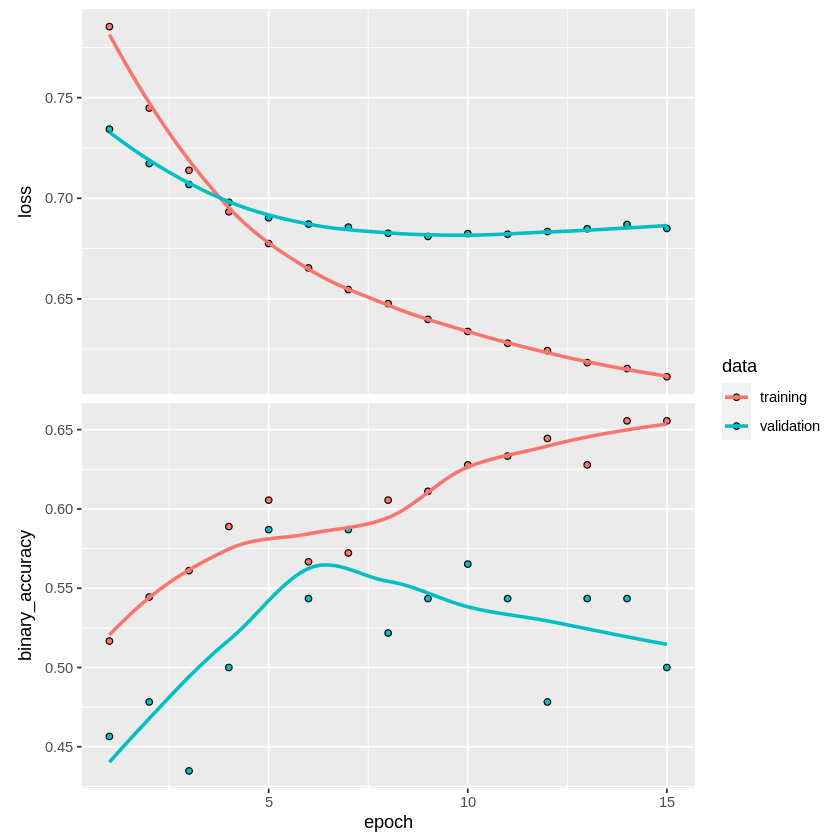

In [49]:
plot(history)

In [50]:
pred <- predict(model, test)
Metrics::auc(test$is_churn, pred)

[1] 0.37625